In [1]:
# Configured for Game of Mirros

import numpy as np
import pylab as pl
import networkx as nx

import random 

In [2]:
# Define the state transition function
# This is the probability that for a given action from a particular state 
# the agent will move to the next state.

# ( current state, action, probability )





In [3]:
# Define the sim environment class that accepts both human input and agent input
class Sim:
    # initialize with LEDs off
    g1 : bool = False
    g2 : bool = False

    # list of states allowed
    states : list = [
        'g1-on, g2-on',  # index 0
        'g1-on, g2-off',
        'g1-off, g2-on',
        'g1-off, g2-off'
    ]

    action_list : list = [
        'no_action', #0
        'g2_off',    #1
        'g2_on'      #2
    ]

    # Possible actions for each state
    # refer to the states by index
    actions = { 
        0 : [0, 1],  # no action or g2_off
        1 : [0, 2],  # no action or etc...
        2 : [0, 1],
        3 : [0, 2]  
    }

    def __init__(self) -> None:
        # send initial state to the aruido board
        self.g1 = False
        self.g2 = False
        return

    def query_state(self) -> str:
        if self.g1 & self.g2:
            return self.states[0]    #'g1-on, g2-on'
        if self.g1 & ~self.g2:
            return self.states[1]    #'g1-on, g2-off'
        if ~self.g1 & self.g2:
            return self.states[2]    #'g1-off, g2-on'
        if ~self.g1 & ~self.g2:
            return self.states[3]    #'g1-off, g2-off'
        return 'error'       
    
    def agent_takes_action(self, action : str) -> None:
        action_index = self.action_list.index(action)

         # no action
        if action_index == 0:
            return False        
        
        # otherwise agent takes action:
        if (action_index == 1) and self.g2:  # g2_off
            self.g2 = False
            return True

        if (action_index == 2) and ~self.g2:
            self.g2 = True
            return True

        return False    

    # the reward is calculate based on if G1 == G2
    def get_reward(self):
        if self.g1 == self.g2:
            return 10        
        return 0
        

    def hello(self):
        return 0
    




In [4]:

# Update the Q matrix and return the score
# aka Q-table
# The Q-matrix is a table that has one row for each state and one column for each possible action. Each entry in the table 
# represents the expected future reward that an agent can achieve by taking a particular action in a given state. 

def update(Q:np.matrix, current_state:int, action:int, gamma:float, my_sim : Sim)->float:  
  
  # based on the action the agent is taking look up the next state:
  # 'action' is effectively the next state, so Q[action, ] get the current scores for this next state
  # here we get the best next action that has being learned, could be tied occurance, so max_index can have multiple values  
  # this is GREEDY algorthim: (i.e. no exploration)
  max_indexes = np.where(Q[action, ] == np.max(Q[action, ]))[1]
  
  if max_indexes.shape[0] > 1:  # if there are multiple best next actions, choose one randomly
      max_index = int(np.random.choice(max_indexes, size = 1))
  else: # otherwise just choose the only index available:
      max_index = int(max_indexes)

  # previous reward value:
  max_value = Q[action, max_index]

  Q[current_state, action] = my_sim.get_reward() + gamma * max_value
  
  # Return the 'avg score' or reward obtained so far in the Q matrix
  if (np.max(Q) > 0):
    return np.sum(Q / np.max(Q)*100)
  else:
    return 0
  

In [8]:
# Q Matrix
# this contains the learned path, Q-values, represents the 'cummulative reward' an agent will rec in each state
# # the Q-value represents how 'good' the action in a particular state is
# The Bellman equation provides a recursive relationship between the value of a state and the values of its neighboring states. 
# It is a fundamental concept in reinforcement learning and is used to update the Q-values in Q-learning.
# The proof that the Bellman equation will converge to the optimal Q-values is based on the following assumptions:
# The environment is stationary, meaning that the transition probabilities and rewards are constant over time.
# The agent explores all state-action pairs infinitely often.
# The learning rate parameter used to update the Q-values satisfies the Robbins-Monro conditions.
# Under these assumptions, it can be shown that the Q-values converge to the true Q-values with probability 
# 1. This means that as the number of iterations approaches infinity, the Q-values obtained through Q-learning will converge to the optimal Q-values.
# The proof for this convergence is provided in many reinforcement learning textbooks, 
# including "Reinforcement Learning: An Introduction" by Sutton and Barto, and "Algorithms for Reinforcement Learning" by Csaba Szepesvári. 
# The proof involves the use of the theory of stochastic approximation, and it is quite technical. If you're interested, I recommend reading one of these textbooks for a detailed explanation of the proof.


# Chooses one of the available actions at random
def agent_decide_action(available_actions : list) -> int:
    random_index = random.randint(0, len(available_actions)-1)    
    return available_actions[random_index]

sim : Sim = Sim()

Q = np.matrix(np.zeros([len(sim.states), len(sim.actions)]))  

gamma = 0.75        # learning rate
scores = []         # this contains the average learned reward at each training step used for 

# Get the initial state the environment is in
current_state = sim.query_state()

learning_steps = 1000
for i in range(0, learning_steps):        
    next_action = agent_decide_action(sim.actions[current_state])                 # Random selection

    # based on the next action determine which state the agent will be in
    sim.agent_takes_action(next_action)

    # get the reward for this action
    score = update(Q, current_state, sim.query_state(), gamma)        # 
    scores.append(score)
    current_state = next_action
  
print("Trained Q matrix:")
print(Q / np.max(Q)*100)


KeyError: 'g1-off, g2-off'

In [6]:

# Testing
current_state = 0
steps = [current_state]  # initialize at current state
  
while current_state != 10:  
    next_step_index = np.where(Q[current_state, ] == np.max(Q[current_state, ]))[1]
    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)
    steps.append(next_step_index)
    current_state = next_step_index
  
print("Most efficient path:")
print(steps)
  
pl.plot(scores)
pl.xlabel('No of iterations')
pl.ylabel('Reward gained')
pl.show()

KeyboardInterrupt: 

Most efficient path:
[0, 1, 3, 9, 10]


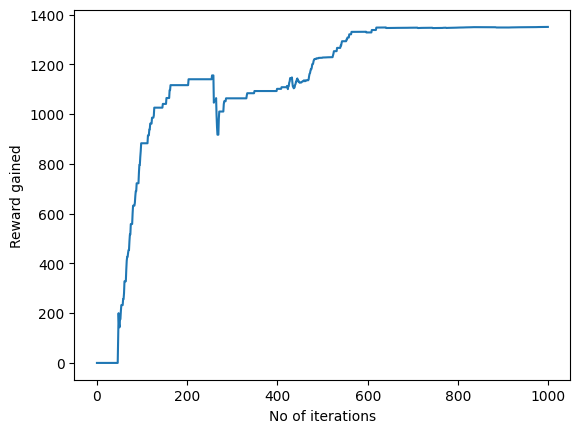

In [ ]:

# Testing
current_state = 0
steps = [current_state]  # initialize at current state
  
while current_state != 10:  
    next_step_index = np.where(Q[current_state, ] == np.max(Q[current_state, ]))[1]
    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)
    steps.append(next_step_index)
    current_state = next_step_index
  
print("Most efficient path:")
print(steps)
  
pl.plot(scores)
pl.xlabel('No of iterations')
pl.ylabel('Reward gained')
pl.show()

In [ ]:
Q[1,]

matrix([[126.16114349,   0.        , 126.50892537, 224.90475622,
           0.        , 126.50892537,   0.        , 168.7273982 ,
           0.        ,   0.        ,   0.        ]])